In [67]:
#loading the data set
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print(Ntr)
batch_size = Ntr

x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
50000


In [88]:
iterations =300
lr =1.4e-6
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    batch_indices=np.random.choice(indices)
    rng.shuffle(indices)
    x=x_train[batch_indices]
    #print(x.shape)
    y=y_train[batch_indices]
    #print(y.shape)
    # Forward pass
    y_pred=x.dot(w1)+b1
    #print(y_pred)
    loss= 1./batch_size*np.square(y_pred-y).sum() + reg*(np.sum(w1*w1))
    loss_history.append(loss)
    if t%10==0:
        print(t,loss,iterations)
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    #print(x.T.shape,dy_pred.shape)
    #dw1=x.T.dot(dy_pred) + reg*w1
    dw1=np.outer(x,dy_pred)
    
    db1=dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay


0 1.1449742848276845e-05 300
10 1.5839020717412935e-05 300
20 1.755361947671094e-05 300
30 1.8995579384881398e-05 300
40 2.3927963978691365e-05 300
50 2.1477668342113038e-05 300
60 1.7388130999010695e-05 300
70 1.538489450948797e-05 300
80 1.4105506819198981e-05 300
90 1.9302333593240477e-05 300
100 1.5965994514543147e-05 300
110 1.845736234917276e-05 300
120 1.7969032985673123e-05 300
130 1.69165631047919e-05 300
140 1.9568654858795594e-05 300
150 1.3041945284926074e-05 300
160 1.7897978355769556e-05 300
170 1.7947775076065757e-05 300
180 1.6524442587117484e-05 300
190 1.8047643026530303e-05 300
200 1.8542804713725126e-05 300
210 1.437004261100209e-05 300
220 1.3058573217961767e-05 300
230 1.7295459319012678e-05 300
240 1.769428666882052e-05 300
250 1.7372879040443286e-05 300
260 1.675043129343239e-05 300
270 1.7984284754393628e-05 300
280 1.7218835319271452e-05 300
290 1.699327755452728e-05 300


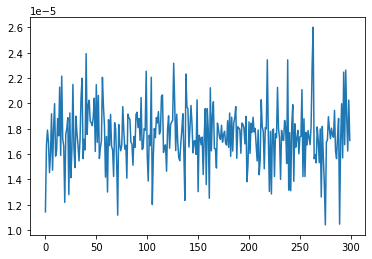

In [89]:
plt.plot(loss_history)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<function matplotlib.pyplot.show(close=None, block=None)>

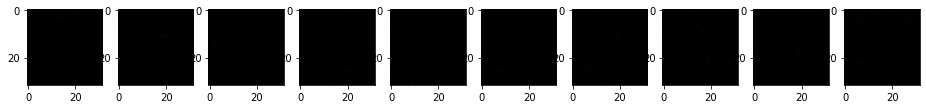

In [70]:
# displaying w as images #not completed
f,axarr=plt.subplots(1,10)
f.set_size_inches(16,6)
for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show

In [90]:
# Printing accuracies
x_t=x_train
y_pred=x_t.dot(w1)+b1
print(y_train.shape)
print(y_pred.shape)
print(np.argmax(y_train,axis=1).shape)
train_acc= 1.0 - 1/Ntr*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred,axis=1))).sum()
print(train_acc)

(50000, 10)
(50000, 10)
(50000,)
-1.6823000000000001
